In [1]:
# Team Lead Name   : P. Tarun Reddy
# Team Member Name : K. C. Pratheek Reddy
# College Name     : Seshadri Rao Gudlavalleru Engineering College

import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import random
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Function to preprocess text, including handling emojis
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF]', '', text)
    # Tokenize text using TweetTokenizer
    tokenizer = TweetTokenizer()
    words = tokenizer.tokenize(text)
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [3]:
# Read the Twitter tweet dataset from the CSV file
df = pd.read_csv('merged_file.csv')

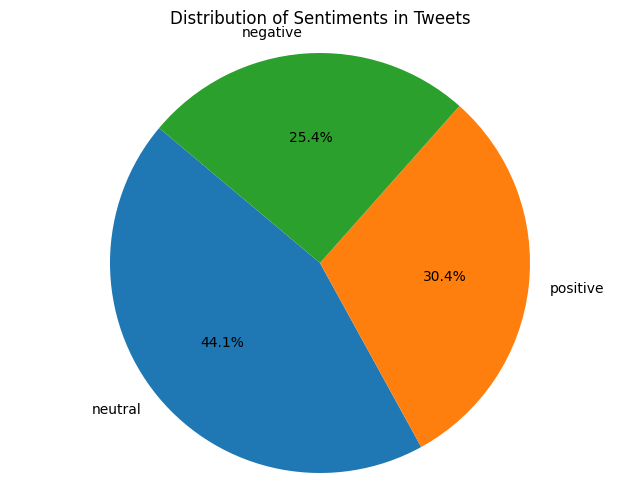

In [4]:
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments in Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
# Calculate counts of positive, neutral, and negative tweets
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
neutral     1652
positive    1140
negative     953
Name: count, dtype: int64


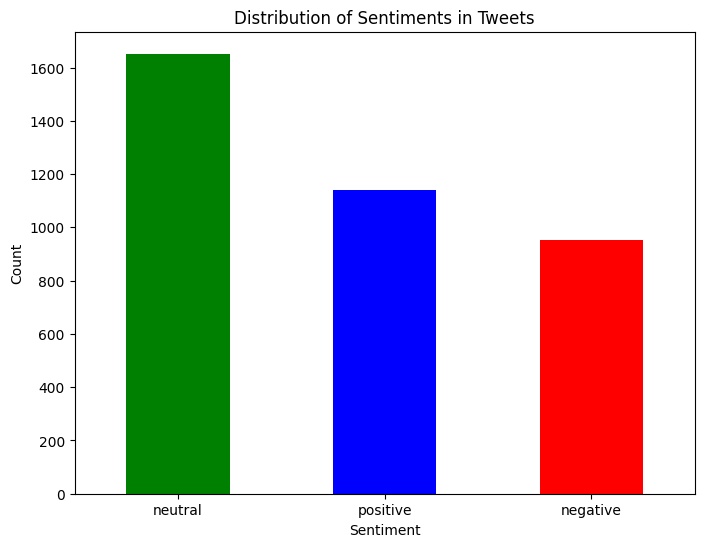

In [9]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

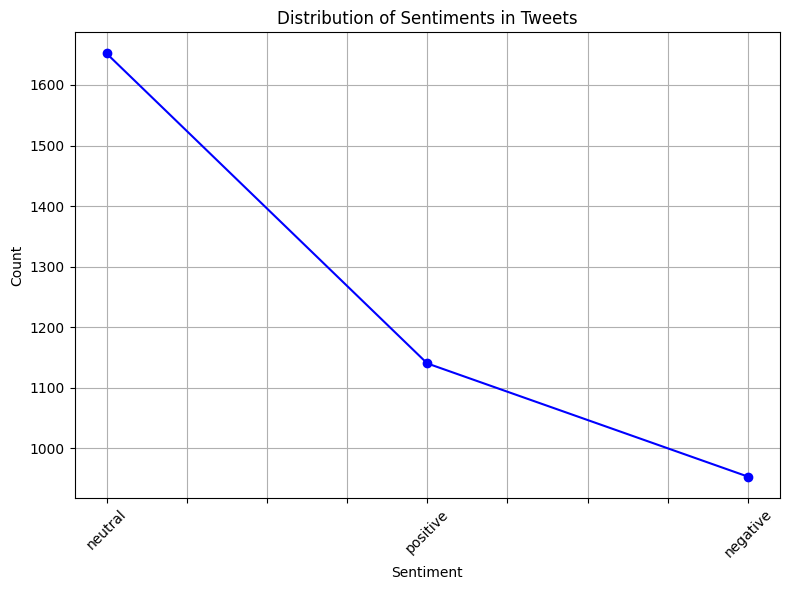

In [10]:
# Create a line chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [38]:
# Shuffle the dataset for randomization
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preprocess the data
df['text'] = df['text'].apply(preprocess_text)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7503337783711616


In [39]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.69      0.81       193
     neutral       0.69      0.89      0.77       332
    positive       0.73      0.60      0.66       224

    accuracy                           0.75       749
   macro avg       0.79      0.73      0.75       749
weighted avg       0.77      0.75      0.75       749



In [40]:
# Test the model with new data
new_tweets = ["This post was Great!","how are you doing?","When your lying in bed and your phone is on your desk and Siri pops up #siriwantstokillme  if I\'m dead tomorrow it was Siri..",]
preprocessed_new_tweets = [preprocess_text(tweet) for tweet in new_tweets]
tfidf_new_tweets = tfidf_vectorizer.transform(preprocessed_new_tweets)
predicted_sentiments = classifier.predict(tfidf_new_tweets)

print("Predicted sentiments for new tweets:")
for tweet, sentiment in zip(new_tweets, predicted_sentiments):
    print(f"- Tweet: {tweet}")
    print(f"  Sentiment: {sentiment}\n")

Predicted sentiments for new tweets:
- Tweet: This post was Great!
  Sentiment: positive

- Tweet: how are you doing?
  Sentiment: neutral

- Tweet: When your lying in bed and your phone is on your desk and Siri pops up #siriwantstokillme  if I'm dead tomorrow it was Siri..
  Sentiment: negative

